In [1]:
import copy
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def do_add(ll, ii_1, ii_2, ii_3, imme_bool):
    if not imme_bool:
        try:
            ll[ii_3] = ii_1 + ii_2
        except:
            print((ii_1, ii_2, ii_3))
            print(ll)
    return 4
    
def do_mul(ll, ii_1, ii_2, ii_3, imme_bool):
    if not imme_bool:
        ll[ii_3] = ii_1 * ii_2
    return 4

def do_store(ll, ii_1, inp_val, imme_bool):
    if not imme_bool:
        ll[ii_1] = inp_val
    return 2

def do_output(ii_1, verbose):
    if verbose:
        print(ii_1)
    return 2

def jump_if_true(ii_1, ii_2, cur):
    if ii_1:
        return ii_2 
    return cur + 3

def jump_if_false(ii_1, ii_2, cur):
    if not ii_1:
        return ii_2 
    return cur + 3

def do_less_than(ll, ii_1, ii_2, ii_3):
    if ii_1 < ii_2:
        ll[ii_3] = 1
    else:
        ll[ii_3] = 0
    return 4

def do_equals(ll, ii_1, ii_2, ii_3):
    if ii_1 == ii_2:
        ll[ii_3] = 1
    else:
        ll[ii_3] = 0
    return 4

def do_adjust_relative_base(ii_1, rel_index, cur):
    return cur + 2, rel_index + ii_1

def set_up_single(jj, ll, cur, rel_index, pos_code=False):   
    # 0: position mode, use value as pointer
    # 1: immediate mode, use value as int
    # 2: relative mode, use value as pointer with offset
    param = str(ll[cur])[:-2]
    if len(param) >=jj and int(param[len(param)-jj]) == 1: # immediate
        return ll[cur+jj], True
    elif len(param) >=jj and int(param[len(param)-jj]) == 2: # relative
        offset = rel_index
    else:
        offset = 0
    if pos_code:
        assert(cur+jj >= 0)
        return ll[cur+jj]+offset, False
    else:
        assert(cur+jj >= 0)
        assert(ll[cur+jj]+offset >= 0)
        return ll[ll[cur+jj]+offset], False

def set_up_inputs_len_3(ll, cur, rel_index):
    ii_3, imme_bool = set_up_single(3, ll, cur, rel_index, pos_code=True)
    ii_2, _ = set_up_single(2, ll, cur, rel_index)
    ii_1, _ = set_up_single(1, ll, cur, rel_index)
    return ii_1, ii_2, ii_3, imme_bool

def get_inp_val(inp_index, inp_val):
    cur_inp_val = inp_val[inp_index]
    return cur_inp_val, inp_index + 1
    
    
def run_computer(ll, inp_val, verbose=True, out_val=[], 
                 cur=0, inp_index=0, rel_index=0):
    # Provide all inputs so computer can be restarted from previous settings
    
    # Extra memory needs to be provided by appending ll before first starting the computer
    
    while ll[cur] % 100 != 99:
        
        if ll[cur] % 100 == 1:
            ii_1, ii_2, ii_3, imme_bool = set_up_inputs_len_3(ll, cur, rel_index)
            cur = cur + do_add(ll, ii_1, ii_2, ii_3, imme_bool)
        elif ll[cur] % 100 == 2:
            ii_1, ii_2, ii_3, imme_bool = set_up_inputs_len_3(ll, cur, rel_index)
            cur = cur + do_mul(ll, ii_1, ii_2, ii_3, imme_bool)
        elif ll[cur] % 100 == 3:
            if len(inp_val) <= inp_index: # Wait till other machines have run so input is available
                return [cur, inp_index, rel_index], False
            ii_1, imme_bool = set_up_single(1, ll, cur, rel_index, pos_code=True)
            cur_inp_val, inp_index = get_inp_val(inp_index, inp_val)
            cur = cur + do_store(ll, ii_1, cur_inp_val, imme_bool)
        elif ll[cur] % 100 == 4:
            ii_1, imme_bool = set_up_single(1, ll, cur, rel_index, pos_code=False)
            last_output = ii_1
            out_val.append(last_output)
            cur = cur + do_output(ii_1, verbose)
        elif ll[cur] % 100 == 5:
            ii_1, _ = set_up_single(1, ll, cur, rel_index)
            ii_2, _ = set_up_single(2, ll, cur, rel_index)
            cur = jump_if_true(ii_1, ii_2, cur)
        elif ll[cur] % 100 == 6:
            ii_1, _ = set_up_single(1, ll, cur, rel_index)
            ii_2, _ = set_up_single(2, ll, cur, rel_index)
            cur = jump_if_false(ii_1, ii_2, cur)
        elif ll[cur] % 100 == 7:
            ii_1, ii_2, ii_3, imme_bool = set_up_inputs_len_3(ll, cur, rel_index)
            cur = cur + do_less_than(ll, ii_1, ii_2, ii_3)
        elif ll[cur] % 100 == 8:
            ii_1, ii_2, ii_3, imme_bool = set_up_inputs_len_3(ll, cur, rel_index)
            cur = cur + do_equals(ll, ii_1, ii_2, ii_3)
        elif ll[cur] % 100 == 9:
            ii_1, _ = set_up_single(1, ll, cur, rel_index)
            cur, rel_index = do_adjust_relative_base(ii_1, rel_index, cur)
        else:
            print(ll)
            raise ValueError
#     return ll
    return last_output, True

In [3]:
ll = [1,330,331,332,109,3080,1101,0,1182,15,1101,0,1403,24,1001,0,0,570,1006,570,36,1002,571,1,0,1001,570,-1,570,1001,24,1,24,1105,1,18,1008,571,0,571,1001,15,1,15,1008,15,1403,570,1006,570,14,21101,58,0,0,1105,1,786,1006,332,62,99,21102,333,1,1,21101,0,73,0,1105,1,579,1102,0,1,572,1101,0,0,573,3,574,101,1,573,573,1007,574,65,570,1005,570,151,107,67,574,570,1005,570,151,1001,574,-64,574,1002,574,-1,574,1001,572,1,572,1007,572,11,570,1006,570,165,101,1182,572,127,101,0,574,0,3,574,101,1,573,573,1008,574,10,570,1005,570,189,1008,574,44,570,1006,570,158,1106,0,81,21102,1,340,1,1105,1,177,21102,477,1,1,1105,1,177,21102,1,514,1,21102,1,176,0,1106,0,579,99,21101,184,0,0,1105,1,579,4,574,104,10,99,1007,573,22,570,1006,570,165,1002,572,1,1182,21101,0,375,1,21102,211,1,0,1105,1,579,21101,1182,11,1,21102,1,222,0,1106,0,979,21101,0,388,1,21102,233,1,0,1105,1,579,21101,1182,22,1,21101,244,0,0,1105,1,979,21101,0,401,1,21101,255,0,0,1106,0,579,21101,1182,33,1,21101,266,0,0,1106,0,979,21101,0,414,1,21102,1,277,0,1105,1,579,3,575,1008,575,89,570,1008,575,121,575,1,575,570,575,3,574,1008,574,10,570,1006,570,291,104,10,21101,1182,0,1,21101,313,0,0,1105,1,622,1005,575,327,1101,1,0,575,21101,327,0,0,1106,0,786,4,438,99,0,1,1,6,77,97,105,110,58,10,33,10,69,120,112,101,99,116,101,100,32,102,117,110,99,116,105,111,110,32,110,97,109,101,32,98,117,116,32,103,111,116,58,32,0,12,70,117,110,99,116,105,111,110,32,65,58,10,12,70,117,110,99,116,105,111,110,32,66,58,10,12,70,117,110,99,116,105,111,110,32,67,58,10,23,67,111,110,116,105,110,117,111,117,115,32,118,105,100,101,111,32,102,101,101,100,63,10,0,37,10,69,120,112,101,99,116,101,100,32,82,44,32,76,44,32,111,114,32,100,105,115,116,97,110,99,101,32,98,117,116,32,103,111,116,58,32,36,10,69,120,112,101,99,116,101,100,32,99,111,109,109,97,32,111,114,32,110,101,119,108,105,110,101,32,98,117,116,32,103,111,116,58,32,43,10,68,101,102,105,110,105,116,105,111,110,115,32,109,97,121,32,98,101,32,97,116,32,109,111,115,116,32,50,48,32,99,104,97,114,97,99,116,101,114,115,33,10,94,62,118,60,0,1,0,-1,-1,0,1,0,0,0,0,0,0,1,20,26,0,109,4,1202,-3,1,587,20102,1,0,-1,22101,1,-3,-3,21101,0,0,-2,2208,-2,-1,570,1005,570,617,2201,-3,-2,609,4,0,21201,-2,1,-2,1106,0,597,109,-4,2106,0,0,109,5,1202,-4,1,630,20101,0,0,-2,22101,1,-4,-4,21102,0,1,-3,2208,-3,-2,570,1005,570,781,2201,-4,-3,653,20102,1,0,-1,1208,-1,-4,570,1005,570,709,1208,-1,-5,570,1005,570,734,1207,-1,0,570,1005,570,759,1206,-1,774,1001,578,562,684,1,0,576,576,1001,578,566,692,1,0,577,577,21101,0,702,0,1105,1,786,21201,-1,-1,-1,1106,0,676,1001,578,1,578,1008,578,4,570,1006,570,724,1001,578,-4,578,21102,1,731,0,1106,0,786,1105,1,774,1001,578,-1,578,1008,578,-1,570,1006,570,749,1001,578,4,578,21101,756,0,0,1105,1,786,1106,0,774,21202,-1,-11,1,22101,1182,1,1,21101,774,0,0,1105,1,622,21201,-3,1,-3,1106,0,640,109,-5,2105,1,0,109,7,1005,575,802,20101,0,576,-6,21002,577,1,-5,1106,0,814,21102,0,1,-1,21101,0,0,-5,21101,0,0,-6,20208,-6,576,-2,208,-5,577,570,22002,570,-2,-2,21202,-5,43,-3,22201,-6,-3,-3,22101,1403,-3,-3,2102,1,-3,843,1005,0,863,21202,-2,42,-4,22101,46,-4,-4,1206,-2,924,21101,0,1,-1,1106,0,924,1205,-2,873,21101,35,0,-4,1106,0,924,1201,-3,0,878,1008,0,1,570,1006,570,916,1001,374,1,374,1201,-3,0,895,1101,2,0,0,1201,-3,0,902,1001,438,0,438,2202,-6,-5,570,1,570,374,570,1,570,438,438,1001,578,558,922,20102,1,0,-4,1006,575,959,204,-4,22101,1,-6,-6,1208,-6,43,570,1006,570,814,104,10,22101,1,-5,-5,1208,-5,39,570,1006,570,810,104,10,1206,-1,974,99,1206,-1,974,1101,0,1,575,21101,0,973,0,1105,1,786,99,109,-7,2105,1,0,109,6,21101,0,0,-4,21101,0,0,-3,203,-2,22101,1,-3,-3,21208,-2,82,-1,1205,-1,1030,21208,-2,76,-1,1205,-1,1037,21207,-2,48,-1,1205,-1,1124,22107,57,-2,-1,1205,-1,1124,21201,-2,-48,-2,1106,0,1041,21102,1,-4,-2,1106,0,1041,21102,1,-5,-2,21201,-4,1,-4,21207,-4,11,-1,1206,-1,1138,2201,-5,-4,1059,1201,-2,0,0,203,-2,22101,1,-3,-3,21207,-2,48,-1,1205,-1,1107,22107,57,-2,-1,1205,-1,1107,21201,-2,-48,-2,2201,-5,-4,1090,20102,10,0,-1,22201,-2,-1,-2,2201,-5,-4,1103,2101,0,-2,0,1106,0,1060,21208,-2,10,-1,1205,-1,1162,21208,-2,44,-1,1206,-1,1131,1105,1,989,21101,0,439,1,1106,0,1150,21102,1,477,1,1106,0,1150,21101,514,0,1,21101,1149,0,0,1106,0,579,99,21101,1157,0,0,1105,1,579,204,-2,104,10,99,21207,-3,22,-1,1206,-1,1138,1201,-5,0,1176,2101,0,-4,0,109,-6,2105,1,0,28,5,38,1,3,1,38,1,3,1,38,1,3,1,38,1,3,1,38,1,3,1,34,9,34,1,3,1,38,1,3,1,38,1,3,1,34,9,34,1,3,1,38,1,3,1,38,1,3,1,34,5,3,5,30,1,11,1,30,1,11,1,30,1,11,1,22,9,11,5,18,1,23,1,18,1,23,1,18,1,23,1,10,7,1,1,19,9,6,1,5,1,1,1,19,1,3,1,3,1,6,1,5,1,1,5,15,1,3,1,3,1,6,1,5,1,5,1,15,1,3,1,3,1,6,11,1,1,1,7,3,5,3,11,6,1,3,1,1,1,1,1,9,1,11,1,5,1,6,1,1,9,7,1,11,1,5,1,6,1,1,1,1,1,1,1,1,1,9,1,11,1,5,1,6,9,1,9,11,7,8,1,1,1,1,1,3,1,30,9,3,1,30,1,3,1,1,1,5,1,30,1,3,1,1,7,30,1,3,1,38,1,3,1,38,1,3,1,38,5,34]

inp_list = []
out_list = []

run_computer(ll+[0]*10000, inp_val=inp_list, 
             verbose=False, out_val=out_list, 
                 cur=0, inp_index=0, rel_index=0)

(10, True)

In [4]:
np.unique(out_list)

array([10, 35, 46, 94])

In [5]:
meta_list = []
sub_list = []
for ii in range(len(out_list)):
    if out_list[ii] == 46:
        sub_list.append(0)
    elif out_list[ii] == 35:
        sub_list.append(1)
    elif out_list[ii] == 10:
        if len(sub_list) > 0:
            meta_list.append(sub_list)
            sub_list = []
    elif out_list[ii] == 94:
        sub_list.append(3)
    else:
        raise(ValueError)
# meta_list.append(np.array(sub_list))
meta_list = np.array(meta_list)

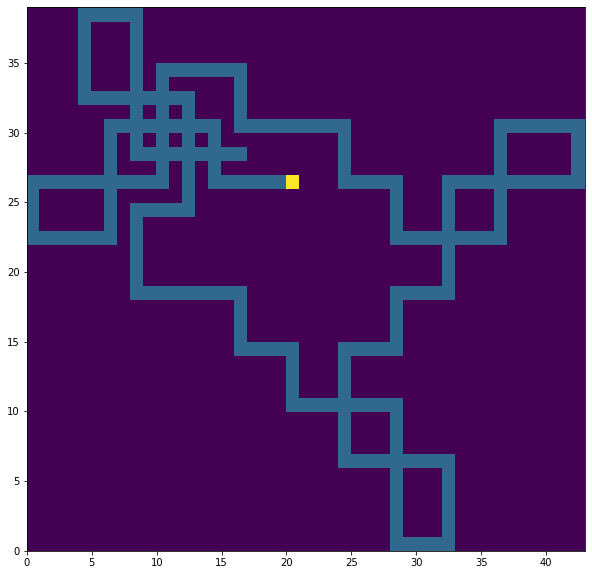

In [6]:
plt.figure(figsize=(10, 10))
plt.pcolormesh(meta_list)

In [7]:
int_map = copy.deepcopy(meta_list)

hh, ww = np.shape(meta_list)

alignment_tally = 0

for ii in range(1, hh-1):
    for jj in range(1, ww-1):
        if meta_list[ii, jj] == meta_list[ii-1, jj] == meta_list[ii+1, jj] == meta_list[ii, jj+1] == meta_list[ii, jj-1] == 1:
            int_map[ii, jj] = 2
#             print((ii, jj))
            align_param = jj * ii
            alignment_tally = alignment_tally + align_param
print('Part one solution')
print(alignment_tally)

Part one solution
4688
